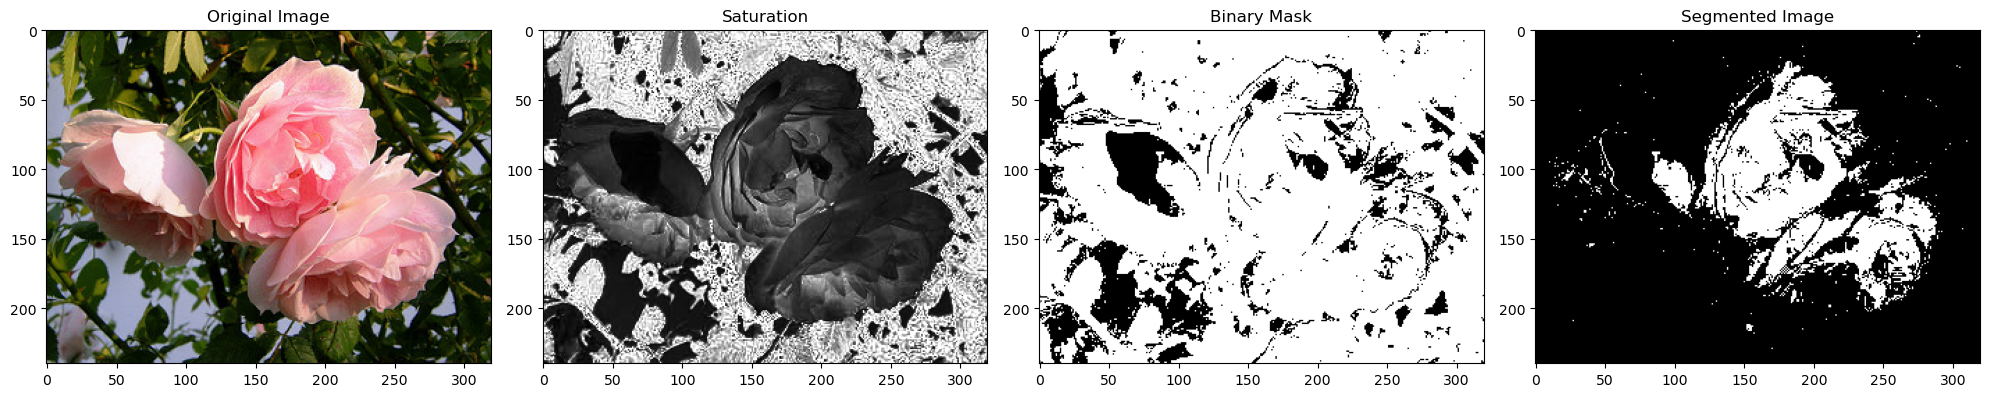

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image

image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Convert to HSI color space (manual implementation)
def rgb_to_hsi(image):
    r, g, b = image[:,:,0]/255.0, image[:,:,1]/255.0, image[:,:,2]/255.0
    intensity = (r + g + b) / 3
    saturation = 1 - (3 / (r + g + b + 1e-6) * np.min([r, g, b], axis=0))
    num = 0.5 * ((r - g) + (r - b))
    den = np.sqrt((r - g) ** 2 + (r - b) * (g - b)) + 1e-6
    hue = np.arccos(num / den)
    hue[b > g] = 2 * np.pi - hue[b > g]
    hue /= 2 * np.pi  # Normalize hue to range [0, 1]
    return hue, saturation, intensity

hue, saturation, intensity = rgb_to_hsi(image)

# Step 2: Threshold the Saturation Image
saturation_threshold = 0.1 * np.max(saturation)
binary_mask = (saturation > saturation_threshold).astype(np.float32)

# Step 3: Multiply Mask with Hue
masked_hue = hue * binary_mask

# Step 4: Threshold the Product Image
hue_threshold = 0.9
binary_segmented = (masked_hue > hue_threshold).astype(np.float32)

# Display Results
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(saturation, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(binary_mask, cmap='gray')
ax[2].set_title('Binary Mask')
ax[3].imshow(binary_segmented, cmap='gray')
ax[3].set_title('Segmented Image')
plt.tight_layout()
plt.show()
